**FAKE CURRENCY ANOMALY DETECTION**

This dataset contains synthetic data representing fake currency samples. It includes information such as the country of origin, denomination, whether the currency is genuine or counterfeit, serial numbers, security features, weight, length, width, and thickness of the currency. The dataset can be used for various machine-learning tasks such as classification, anomaly detection, and feature engineering. It is suitable for exploring patterns and trends in counterfeit currency and analyzing the effectiveness of security features.


1.Importing the dependencies and dataset

About this file


*   Country: Country of origin for the currency
*   Denomination: Currency denomination.
*   Counterfeit: Binary indicator (0 for genuine, 1 for counterfeit)
*   SerialNumber: Serial number of the currency.
*   Security Features: Security features present in the currency.
*   Weight: Weight of the currency in grams.
*   Length: Length of the currency in mm.
*   Width: Width of the currency in mm.
*   Thickness: Thickness of the currency in mm.










In [90]:
import numpy as np
import pandas as pd

In [91]:
df=pd.read_csv("/content/fake_currency_data.csv")
df

,Country,Denomination,Counterfeit,SerialNumber,SecurityFeatures,Weight,Length,Width,Thickness
0,USA,$100,1,25973198,Hologram,1.731759,130.243185,66.537999,0.098488
1,USA,$20,1,95903230,Security Thread,1.002179,152.596364,76.135834,0.094119
2,EU,€10,0,82937914,Hologram,2.306713,152.857126,66.772442,0.061393
3,USA,€20,1,23612989,Microprint,1.366965,143.133672,78.377052,0.053114
4,EU,€20,1,56025342,Watermark,1.796075,129.664777,75.916093,0.051438
...,...,...,...,...,...,...,...,...,...
999995,EU,$100,1,24436622,Watermark,1.472511,134.888731,75.425943,0.093939
999996,EU,£20,1,82654212,Hologram,2.355633,147.830149,65.232274,0.097358
999997,USA,$5,0,59174754,Microprint,1.393764,150.050308,69.273269,0.068363
999998,EU,£10,0,55268089,Watermark,2.026417,142.852137,77.878841,0.081160


2.Preprocessing the dataset



we perform univariate analysis on the dataset.
First, we print the dataset information and descriptive statistics.

In [92]:
df.describe()

,Counterfeit,SerialNumber,Weight,Length,Width,Thickness
count,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.499391,5.502259e+07,1.649766,140.020542,70.003944,0.074995
std,0.500000,2.598490e+07,0.490712,11.544293,5.772709,0.014442
min,0.000000,1.000015e+07,0.800003,120.000073,60.000005,0.050000
25%,0.000000,3.249784e+07,1.224855,130.034878,64.999762,0.062487
50%,0.000000,5.506594e+07,1.649137,140.032496,70.008440,0.074992
75%,1.000000,7.751115e+07,2.074540,150.022309,75.006372,0.087499
max,1.000000,9.999994e+07,2.499999,159.999961,79.999983,0.100000


Then, not Any missing values in dataset

In [93]:
df.isnull().sum()

Country             0
Denomination        0
Counterfeit         0
SerialNumber        0
SecurityFeatures    0
Weight              0
Length              0
Width               0
Thickness           0
dtype: int64

*Adding the features from exsting dataset*
*   Area: Area of the currency in mm^2.
*   volume: volume of the currency in mm^3.
*   Aspect_ratio: length/Width of the currency .
*   Weight_to_Area_Ratio: weight/area of the currency.
*   Weight_to_Volume_Ratio: weight/volume of the currency.




In [94]:
df['Area'] = df['Length'] * df['Width']
df['Volume'] = df['Length'] * df['Width'] * df['Thickness']
df['Aspect_Ratio'] = df['Length'] / df['Width']
df['Weight_to_Area_Ratio'] = df['Weight'] / df['Area']
df['Weight_to_Volume_Ratio'] = df['Weight'] / df['Volume']

In [95]:
df

,Country,Denomination,Counterfeit,SerialNumber,SecurityFeatures,Weight,Length,Width,Thickness,Area,Volume,Aspect_Ratio,Weight_to_Area_Ratio,Weight_to_Volume_Ratio
0,USA,$100,1,25973198,Hologram,1.731759,130.243185,66.537999,0.098488,8666.120975,853.511671,1.957426,0.000200,0.002029
1,USA,$20,1,95903230,Security Thread,1.002179,152.596364,76.135834,0.094119,11618.051441,1093.479679,2.004265,0.000086,0.000917
2,EU,€10,0,82937914,Hologram,2.306713,152.857126,66.772442,0.061393,10206.643517,626.613051,2.289225,0.000226,0.003681
3,USA,€20,1,23612989,Microprint,1.366965,143.133672,78.377052,0.053114,11218.395270,595.855958,1.826219,0.000122,0.002294
4,EU,€20,1,56025342,Watermark,1.796075,129.664777,75.916093,0.051438,9843.643273,506.339912,1.708001,0.000182,0.003547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,EU,$100,1,24436622,Watermark,1.472511,134.888731,75.425943,0.093939,10174.109805,955.750386,1.788360,0.000145,0.001541
999996,EU,£20,1,82654212,Hologram,2.355633,147.830149,65.232274,0.097358,9643.296759,938.849687,2.266212,0.000244,0.002509
999997,USA,$5,0,59174754,Microprint,1.393764,150.050308,69.273269,0.068363,10394.475278,710.601323,2.166064,0.000134,0.001961
999998,EU,£10,0,55268089,Watermark,2.026417,142.852137,77.878841,0.081160,11125.158811,902.916747,1.834287,0.000182,0.002244


Dropping the not effective features here it is a serial number beacuse they are unique identity.

In [96]:
df = df.drop(['SerialNumber'], axis=1)
df

,Country,Denomination,Counterfeit,SecurityFeatures,Weight,Length,Width,Thickness,Area,Volume,Aspect_Ratio,Weight_to_Area_Ratio,Weight_to_Volume_Ratio
0,USA,$100,1,Hologram,1.731759,130.243185,66.537999,0.098488,8666.120975,853.511671,1.957426,0.000200,0.002029
1,USA,$20,1,Security Thread,1.002179,152.596364,76.135834,0.094119,11618.051441,1093.479679,2.004265,0.000086,0.000917
2,EU,€10,0,Hologram,2.306713,152.857126,66.772442,0.061393,10206.643517,626.613051,2.289225,0.000226,0.003681
3,USA,€20,1,Microprint,1.366965,143.133672,78.377052,0.053114,11218.395270,595.855958,1.826219,0.000122,0.002294
4,EU,€20,1,Watermark,1.796075,129.664777,75.916093,0.051438,9843.643273,506.339912,1.708001,0.000182,0.003547
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,EU,$100,1,Watermark,1.472511,134.888731,75.425943,0.093939,10174.109805,955.750386,1.788360,0.000145,0.001541
999996,EU,£20,1,Hologram,2.355633,147.830149,65.232274,0.097358,9643.296759,938.849687,2.266212,0.000244,0.002509
999997,USA,$5,0,Microprint,1.393764,150.050308,69.273269,0.068363,10394.475278,710.601323,2.166064,0.000134,0.001961
999998,EU,£10,0,Watermark,2.026417,142.852137,77.878841,0.081160,11125.158811,902.916747,1.834287,0.000182,0.002244


3.Exploratory Data Analysis (EDA)

A.number of counterfeit & real note v/s country table & graph
*  Almost same number of counterfeit and real note to all three countries (EU,UK,USA)




Country  Counterfeit
EU       0              166763
         1              166288
UK       0              167112
         1              166499
USA      0              166734
         1              166604
Name: count, dtype: int64


<Axes: xlabel='Country'>

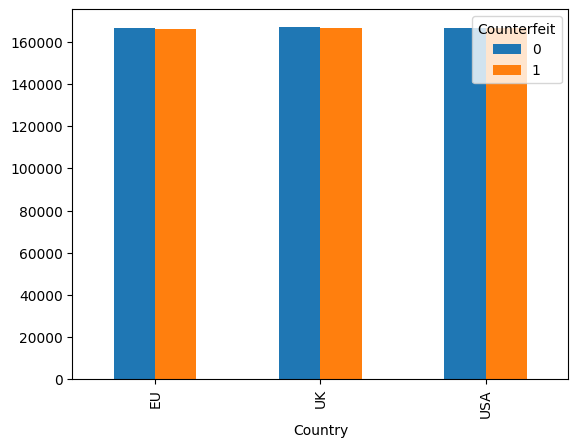

In [97]:
# prompt: country vs number of counterfeit & real not graph

country_counts = df.groupby('Country')['Counterfeit'].value_counts()
print(country_counts)
country_counts.unstack().plot(kind='bar')


B. percentage of security features

*   same percentage of all security features in this dataset



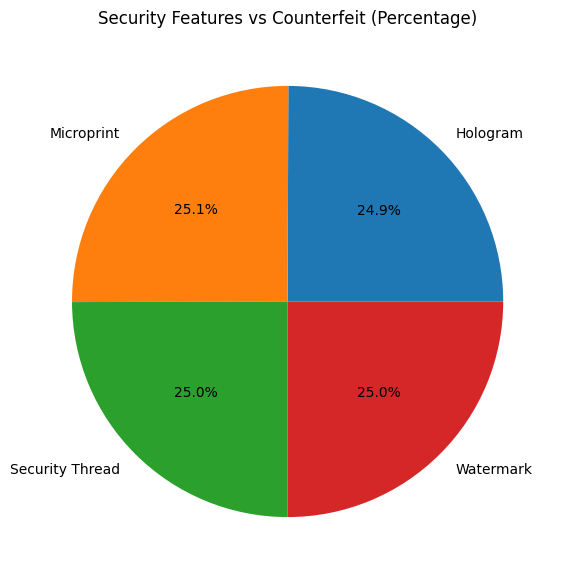

In [98]:
# prompt: securty features vs counter feit pie chart

security_features = df.groupby('SecurityFeatures')['Counterfeit'].value_counts()
security_features_unstacked = security_features.unstack()
security_features_unstacked['Total'] = security_features_unstacked[1] + security_features_unstacked[0]
security_features_unstacked['Percentage'] = (security_features_unstacked[1] / security_features_unstacked['Total']) * 100

plt.figure(figsize=(10, 7))
plt.pie(security_features_unstacked['Percentage'], labels=security_features_unstacked.index, autopct='%1.1f%%')
plt.title('Security Features vs Counterfeit (Percentage)')
plt.show()


C.security features v/s country table & graph

*   Almost same number of all seacurityfeatures and real note to all three countries (EU,UK,USA)




Country  SecurityFeatures
EU       Microprint          83702
         Hologram            83246
         Security Thread     83183
         Watermark           82920
UK       Watermark           83646
         Security Thread     83430
         Hologram            83416
         Microprint          83119
USA      Security Thread     83595
         Microprint          83544
         Hologram            83384
         Watermark           82815
Name: count, dtype: int64


<Axes: xlabel='Country,SecurityFeatures'>

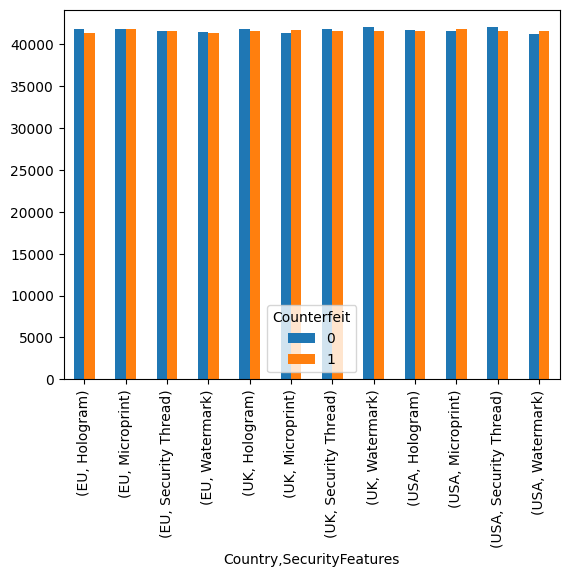

In [99]:
# prompt: secrity features vs country

security_features_country = df.groupby(['Country', 'SecurityFeatures'])['Counterfeit'].value_counts()
print(country_security_features)
security_features_country.unstack().plot(kind='bar')


D.number of counterfeit & real note v/s Denomination pie chart



*   Almost same number of counterfeit and real note to all three countries (EU,UK,USA)




Counterfeit       0      1  Total
Denomination                     
$1            41706  41640  83346
$10           41584  41648  83232
$100          42022  41590  83612
$20           41654  41407  83061
$5            41558  41310  82868
$50           41850  41743  83593
£10           41718  41714  83432
£20           41820  41422  83242
£5            41651  41541  83192
€10           41503  41656  83159
€20           41647  41847  83494
€5            41896  41873  83769


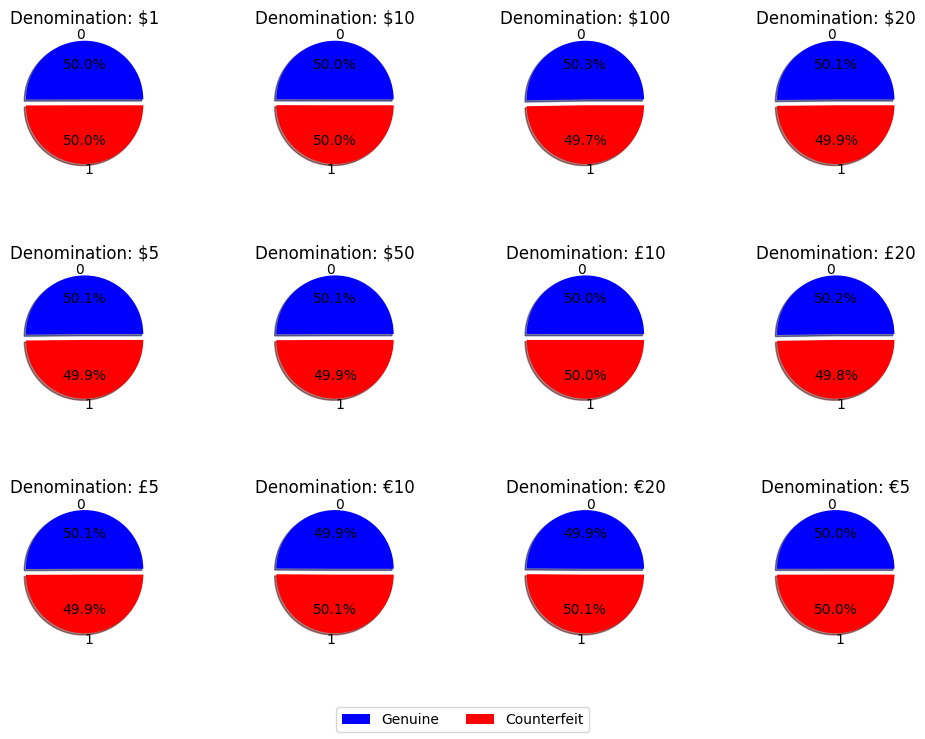

In [100]:
# prompt: C.number of counterfeit & real note v/s Denomination pie chart  removing overlapping
denomination_counts = df.groupby('Denomination')['Counterfeit'].value_counts()
denomination_counts_unstacked = denomination_counts.unstack()
denomination_counts_unstacked['Total'] = denomination_counts_unstacked[1] + denomination_counts_unstacked[0]

print(denomination_counts_unstacked)

import matplotlib.pyplot as plt
import numpy as np

# Group data by denomination and counterfeit status
grouped_data = df.groupby(['Denomination', 'Counterfeit']).size().unstack()

# Create a figure with a 2x2 grid of subplots
fig, axs = plt.subplots(3, 4, figsize=(12, 8))
axs = axs.ravel()  # Flatten the axes

# Iterate over the first four denominations
for i, denomination in enumerate(grouped_data.index[:12]):
    group = grouped_data.loc[denomination]
    colors = ['red' if counterfeit else 'blue' for counterfeit in group.index]
    wedges, texts, autotexts = axs[i].pie(group, labels=group.index, colors=colors, autopct="%1.1f%%", shadow=True, explode=(0.1, 0))
    axs[i].set_title(f"Denomination: {denomination}")

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Add a legend
fig.legend([plt.Rectangle((0, 0), 1, 1, fc='blue'), plt.Rectangle((0, 0), 1, 1, fc='red')], ['Genuine', 'Counterfeit'], loc='lower center', ncol=4)

plt.show()

E.seacurty features graph by country


*   all of security features presents.


SecurityFeatures  Hologram  Microprint  Security Thread  Watermark
Denomination                                                      
$1                   20887       20848            20912      20699
$10                  20682       20986            20837      20727
$100                 20843       21074            20845      20850
$20                  20841       20640            20711      20869
$5                   20725       20593            20749      20801
$50                  20926       20830            20882      20955
£10                  21133       20971            20670      20658
£20                  20764       20943            20965      20570
£5                   20675       20879            20972      20666
€10                  20823       20696            20798      20842
€20                  20926       20852            20875      20841
€5                   20821       21053            20992      20903


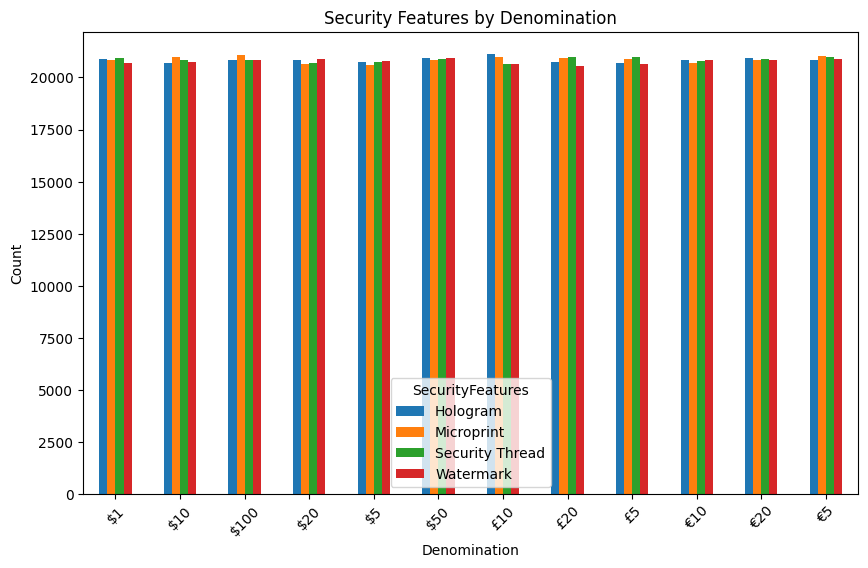

In [101]:
# prompt: denomination vs seacurty features graph print the value also

import matplotlib.pyplot as plt

# Create a crosstab of denomination vs security features
security_features_by_denomination = pd.crosstab(df['Denomination'], df['SecurityFeatures'])

# Print the values of the crosstab
print(security_features_by_denomination)

# Plot the crosstab as a bar chart
security_features_by_denomination.plot(kind='bar', figsize=(10, 6))
plt.title('Security Features by Denomination')
plt.xlabel('Denomination')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()





F.Corelation matrix shown by Heatmap


*   weight,length,width,thichness not any relation as expected.
*   newly created a columns was highly corelated with they formed.





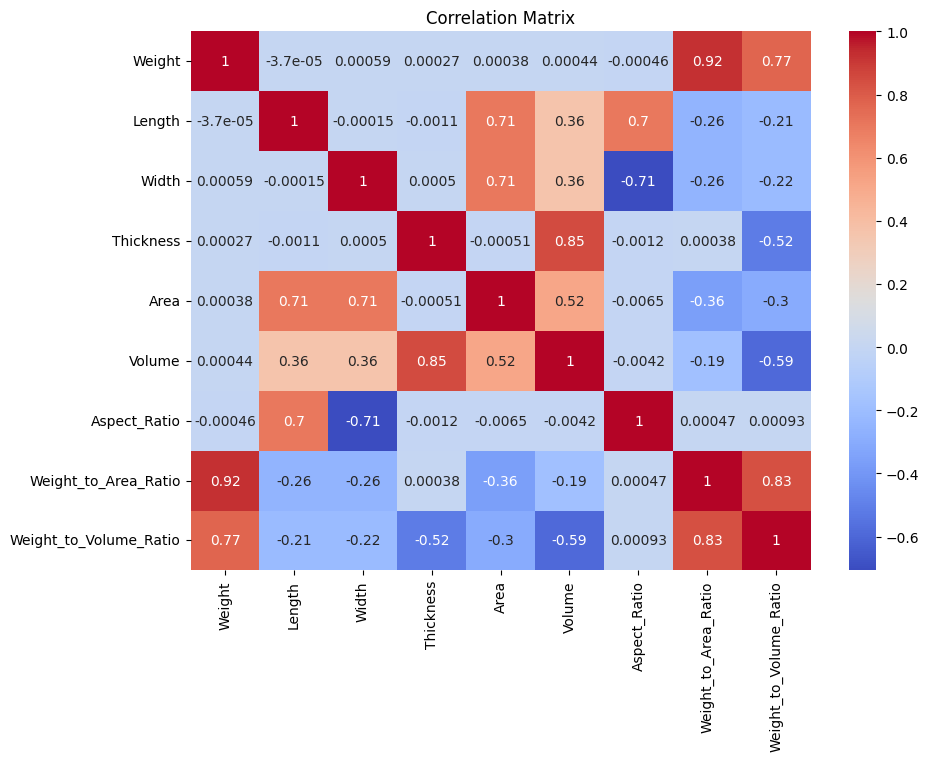

In [102]:
# prompt: corellation matrix Weight	Length	Width	Thickness	Area	Volume	Aspect_Ratio	Weight_to_Area_Ratio	Weight_to_Volume_Ratio graph

import matplotlib.pyplot as plt
import seaborn as sns

corr = df[['Weight', 'Length', 'Width', 'Thickness', 'Area', 'Volume', 'Aspect_Ratio', 'Weight_to_Area_Ratio', 'Weight_to_Volume_Ratio']].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


G. distrubation plot of Numerical colums

*   here all types of value of weight between 0.8 to 2.5
*   here all types of value of length between 120 to 160
*   here all types of value of width between 60 to 80
*   here all types of value of thickness between 0.0500 to 0.1000





<ipython-input-103-16b6a7be08fc>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


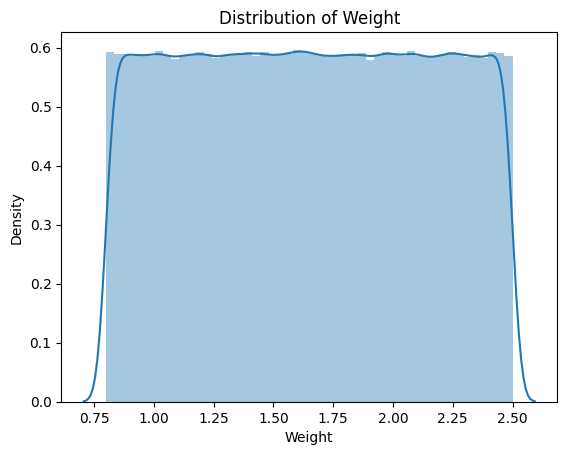

<ipython-input-103-16b6a7be08fc>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


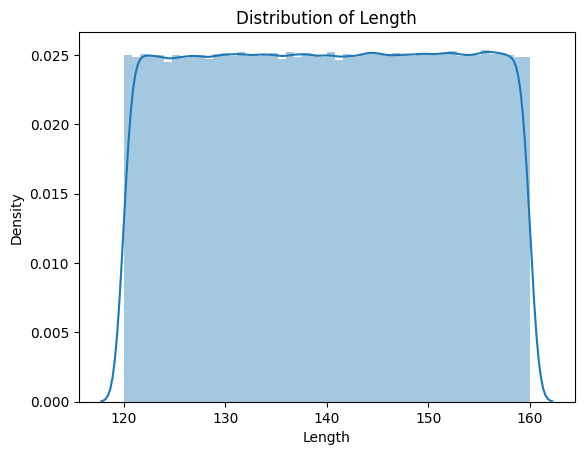

<ipython-input-103-16b6a7be08fc>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


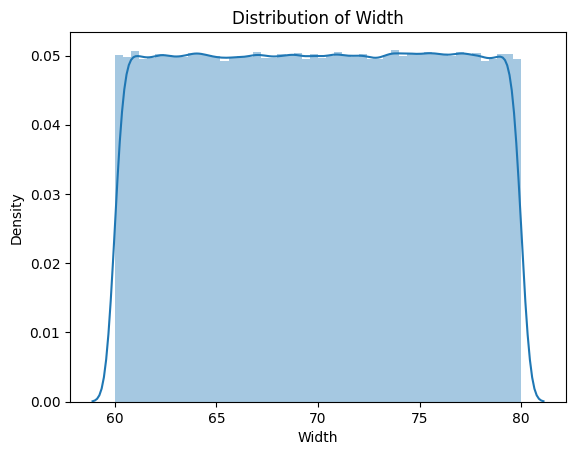

<ipython-input-103-16b6a7be08fc>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


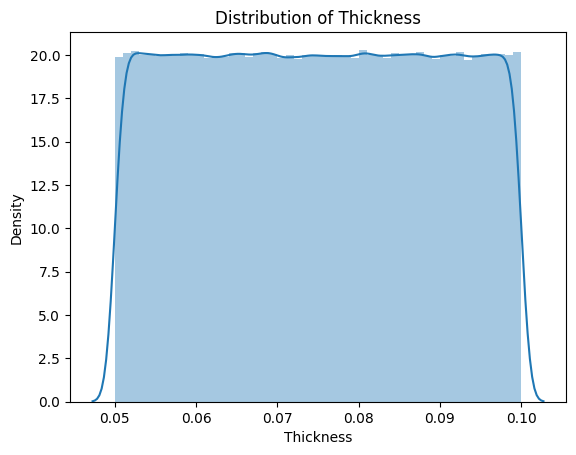

<ipython-input-103-16b6a7be08fc>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


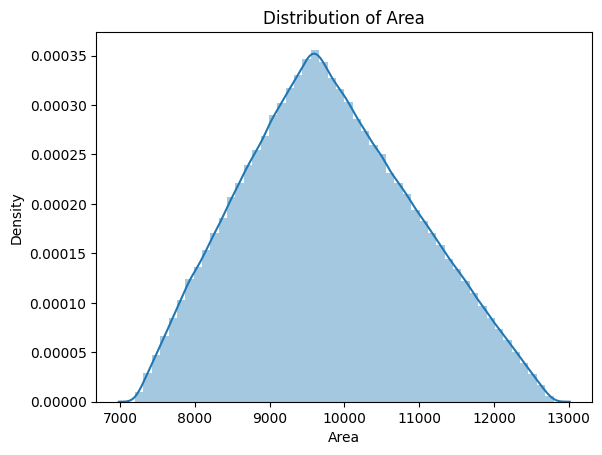

<ipython-input-103-16b6a7be08fc>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


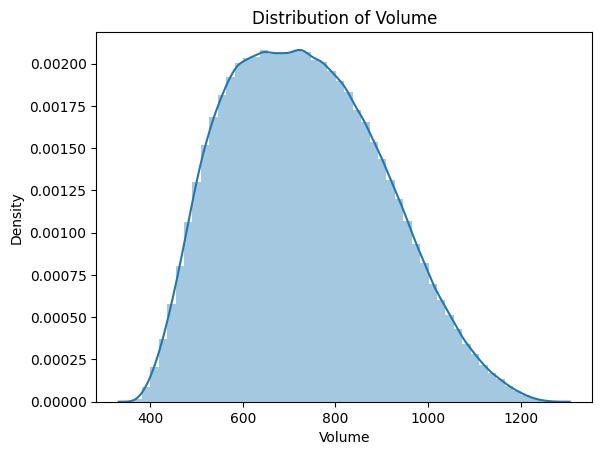

<ipython-input-103-16b6a7be08fc>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


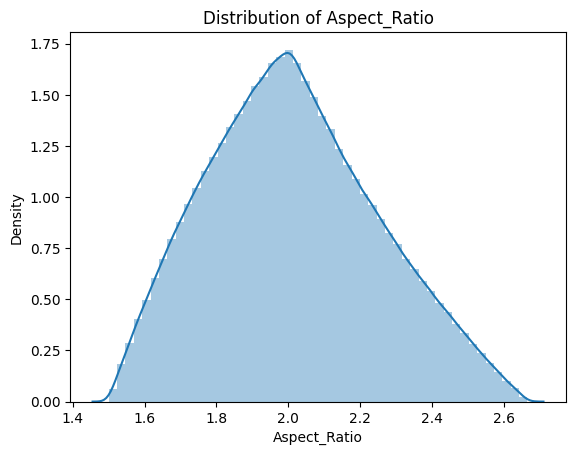

<ipython-input-103-16b6a7be08fc>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


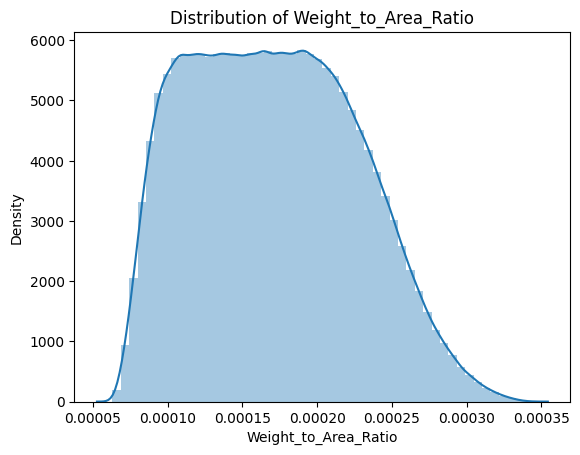

<ipython-input-103-16b6a7be08fc>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


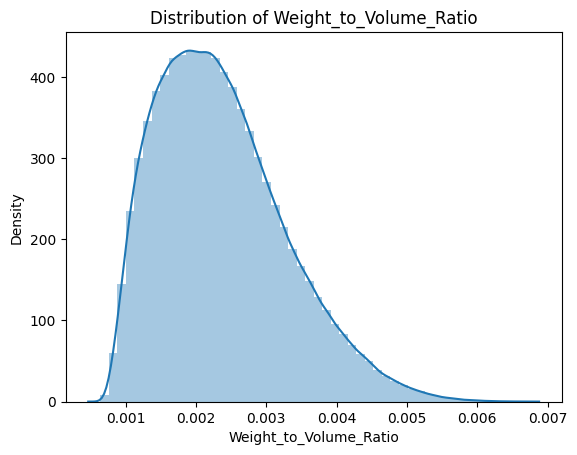

In [103]:
# prompt: Weight	Length	Width	Thickness	Area	Volume	Aspect_Ratio	Weight_to_Area_Ratio	Weight_to_Volume_Ratio  disturbution

# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of the columns to be analyzed
columns = ['Weight', 'Length', 'Width', 'Thickness', 'Area', 'Volume', 'Aspect_Ratio', 'Weight_to_Area_Ratio', 'Weight_to_Volume_Ratio']

# Iterate through each column and create a distribution plot
for column in columns:
  plt.figure()
  sns.distplot(df[column])
  plt.title(f'Distribution of {column}')
  plt.show()


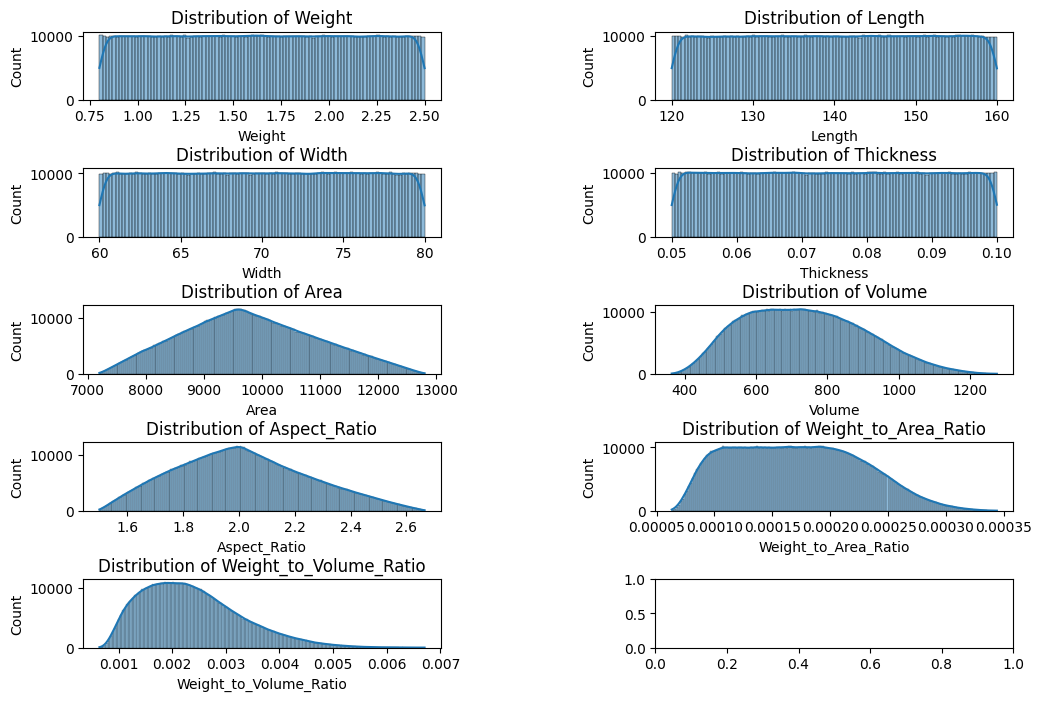

In [108]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of the columns to be analyzed
columns = ['Weight', 'Length', 'Width', 'Thickness', 'Area', 'Volume', 'Aspect_Ratio', 'Weight_to_Area_Ratio', 'Weight_to_Volume_Ratio']

# Create a figure with a 2x2 grid of subplots
fig, axs = plt.subplots(5, 2, figsize=(12, 8))
axs = axs.ravel()  # Flatten the axes

# Iterate through the first four columns and create histogram plots
for i, column in enumerate(columns[:9]):
    sns.histplot(data=df, x=column, ax=axs[i], kde=True)
    axs[i].set_title(f'Distribution of {column}')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.6, hspace=1)

plt.show()


H. box plot of numerical featurres

*   they indicates no outliers present in this datasets  



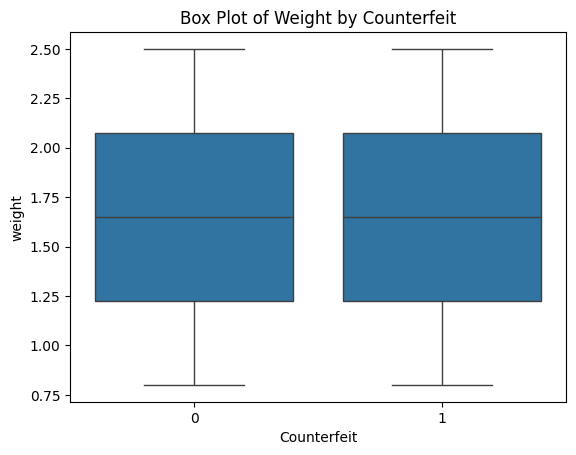

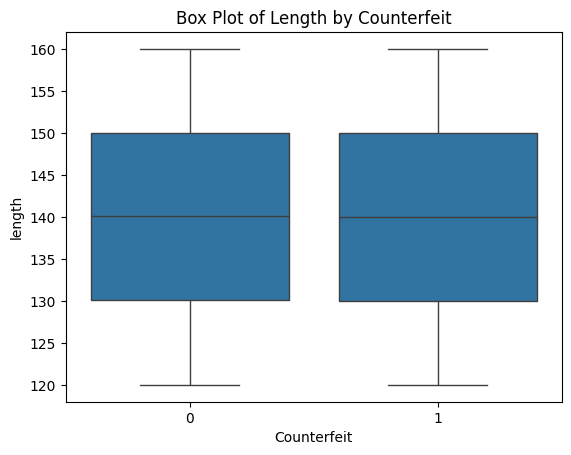

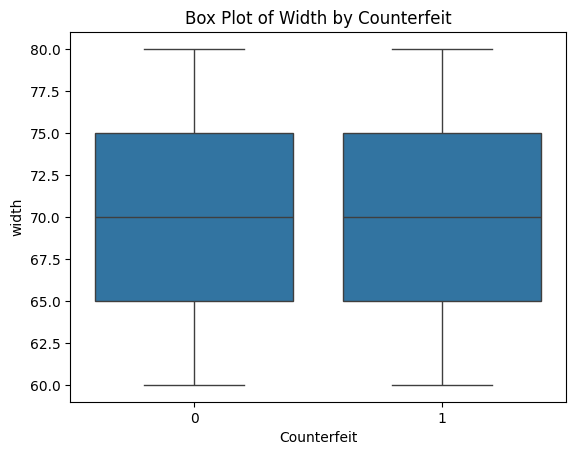

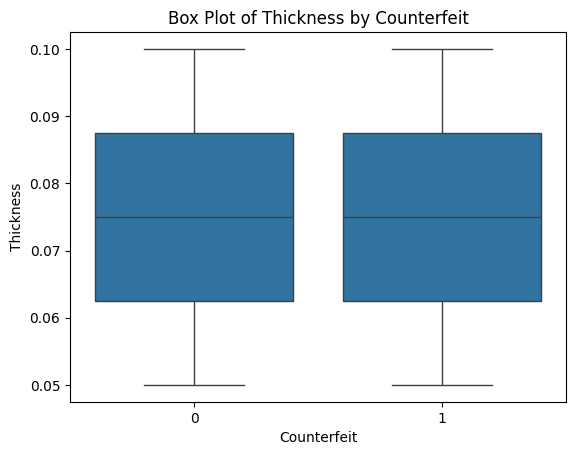

In [105]:
# Create a box plot of Weight by Counterfeit
plt.figure()
sns.boxplot(x='Counterfeit', y='Weight', data=df)
plt.xlabel('Counterfeit')
plt.ylabel('weight')
plt.title('Box Plot of Weight by Counterfeit')
plt.show()

# Create a box plot of Length by Counterfeit
plt.figure()
sns.boxplot(x='Counterfeit', y='Length', data=df)
plt.xlabel('Counterfeit')
plt.ylabel('length')
plt.title('Box Plot of Length by Counterfeit')
plt.show()

# Create a box plot of Thickness by Counterfeit
plt.figure()
sns.boxplot(x='Counterfeit', y='Width', data=df)
plt.xlabel('Counterfeit')
plt.ylabel('width')
plt.title('Box Plot of Width by Counterfeit')
plt.show()

# Create a box plot of Thickness by Counterfeit
plt.figure()
sns.boxplot(x='Counterfeit', y='Thickness', data=df)
plt.xlabel('Counterfeit')
plt.ylabel('Thickness')
plt.title('Box Plot of Thickness by Counterfeit')
plt.show()
